 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [50]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [51]:
# Reading whale returns
print(Path.cwd())
whale_returns_csv = Path("C:/Users/Lenovo 80XS/utor-tor-fin-pt-09-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.head()

C:\Users\Lenovo 80XS\utor-tor-fin-pt-09-2020-u-c\02-Homework\04-Pandas\Instructions\Starter_Code


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [52]:
# Count nulls
# Count nulls

print(whale_returns.isnull().sum())



SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [53]:
# Drop nulls

whale_returns = whale_returns.dropna().copy()
whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [54]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [55]:
# Reading algorithmic returns
algo_returns_csv = Path("C:/Users/Lenovo 80XS/utor-tor-fin-pt-09-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [56]:
# Count nulls

algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [57]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns.head()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [58]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [59]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("C:/Users/Lenovo 80XS/utor-tor-fin-pt-09-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_tsx_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_tsx_history.sort_index(ascending = True, inplace = True)
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [60]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [61]:
# Fix Data Types
# Fix Data Types
sp_tsx_history["Close"]= sp_tsx_history["Close"].str.replace("$" , "")
sp_tsx_history["Close"]= sp_tsx_history["Close"].str.replace("," , "")
sp_tsx_history.head()



,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [62]:
sp_tsx_history["Close"]= sp_tsx_history["Close"].astype("float")
sp_tsx_history.dtypes

Close    float64
dtype: object

In [63]:
sp_tsx_history["Close"]= sp_tsx_history["Close"].astype("float")
sp_tsx_history.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [64]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_history.pct_change()
sp_tsx_daily_returns.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [65]:
# Drop nulls
sp_tsx_daily_returns = sp_tsx_daily_returns.dropna()
sp_tsx_daily_returns.head()


,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [66]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns = sp_tsx_daily_returns.rename(columns= {"Close": "tsx_60"})
sp_tsx_daily_returns.head()

,tsx_60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [67]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
df_daily = pd.concat([whale_returns, algo_returns,sp_tsx_daily_returns], axis = "columns",join = "inner")
df_daily

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,tsx_60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

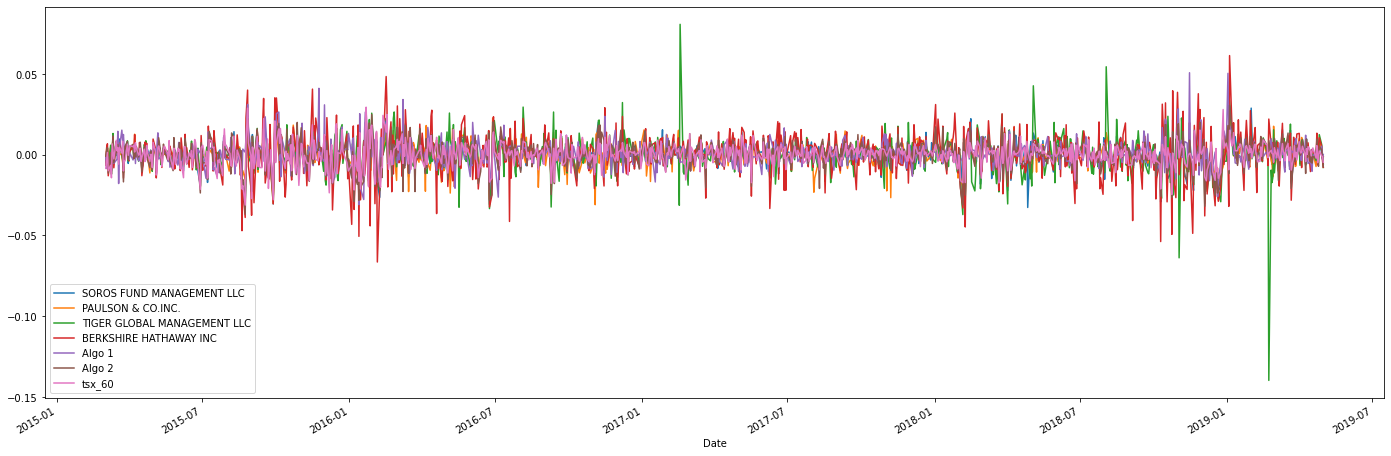

In [68]:
# Plot daily returns of all portfolios
df_daily.plot(figsize = (24,8))


#### Calculate and Plot cumulative returns.

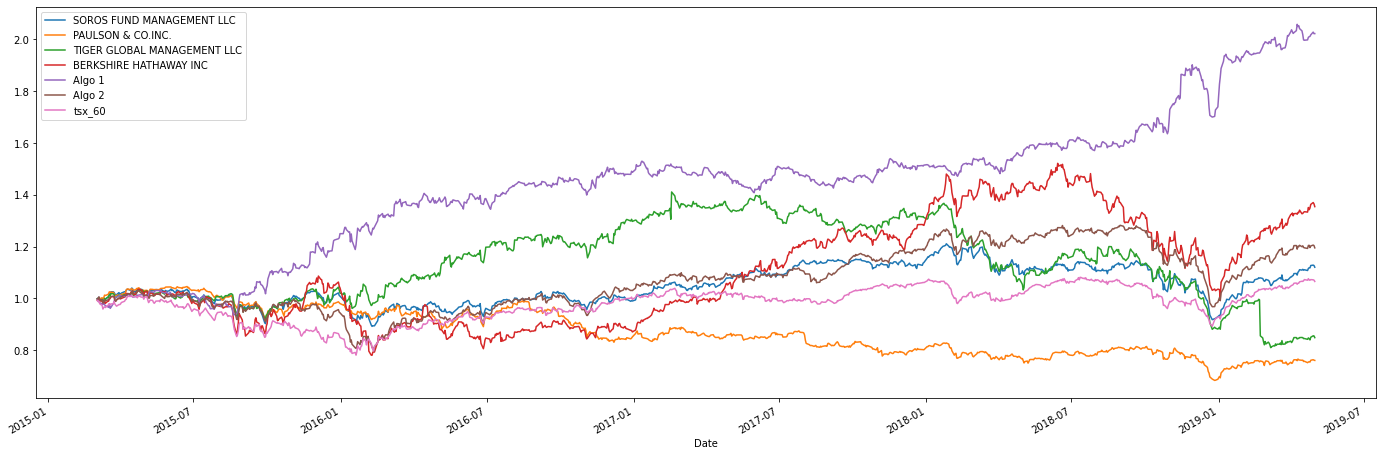

In [69]:
# Calculate cumulative returns of all portfolios
df_cum = (1+ df_daily).cumprod()

# Plot cumulative returns
df_cum.plot(figsize = (24,8))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P TSX 60
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


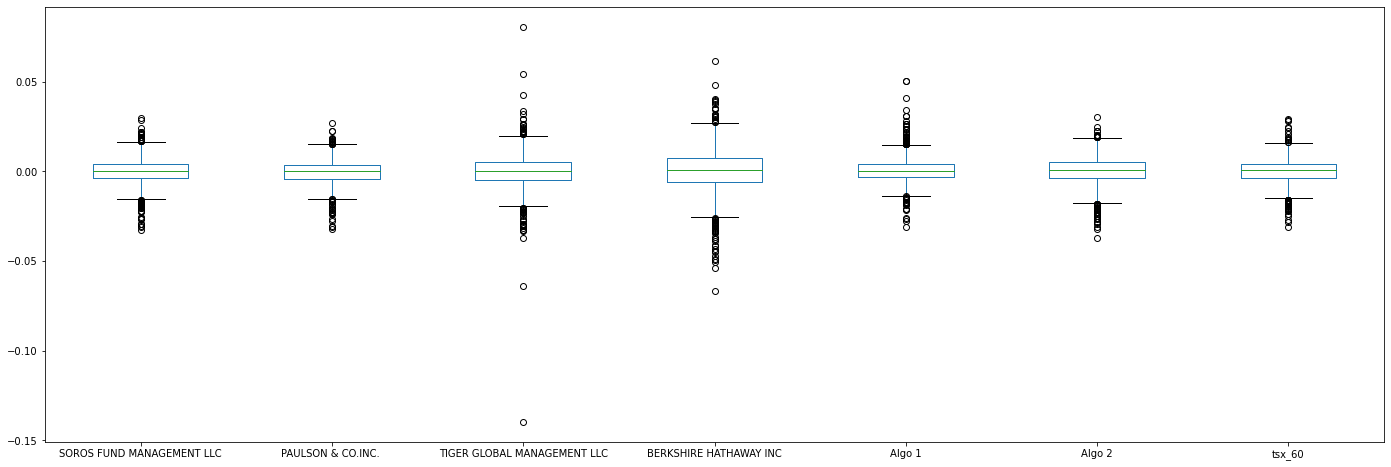

In [70]:
# Box plot to visually show risk
df_daily.plot(kind = "box", figsize = (24,8))

### Calculate Standard Deviations

In [71]:
# Calculate the daily standard deviations of all portfolios
df_daily_std = pd.DataFrame(df_daily.std()).rename(columns = {0:"std"})
df_daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
tsx_60,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [72]:
# Calculate  the daily standard deviation of S&P Tsx

# Determine which portfolios are riskier than the S&P TSX 60
df_daily_std = df_daily_std.sort_values(by='std',ascending = False)

### Calculate the Annualized Standard Deviation

In [73]:
# Calculate the annualized standard deviation (252 trading days)

df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std

,std
BERKSHIRE HATHAWAY INC,0.203599
TIGER GLOBAL MANAGEMENT LLC,0.172759
Algo 2,0.132177
SOROS FUND MANAGEMENT LLC,0.124259
Algo 1,0.120470
tsx_60,0.111664
PAULSON & CO.INC.,0.110841


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60
3. Calculate and plot a 60-day Beta for Berkshire Hathaway Inc compared to the S&P 60 TSX

### Calculate and plot rolling `std` for all portfolios with 21-day window

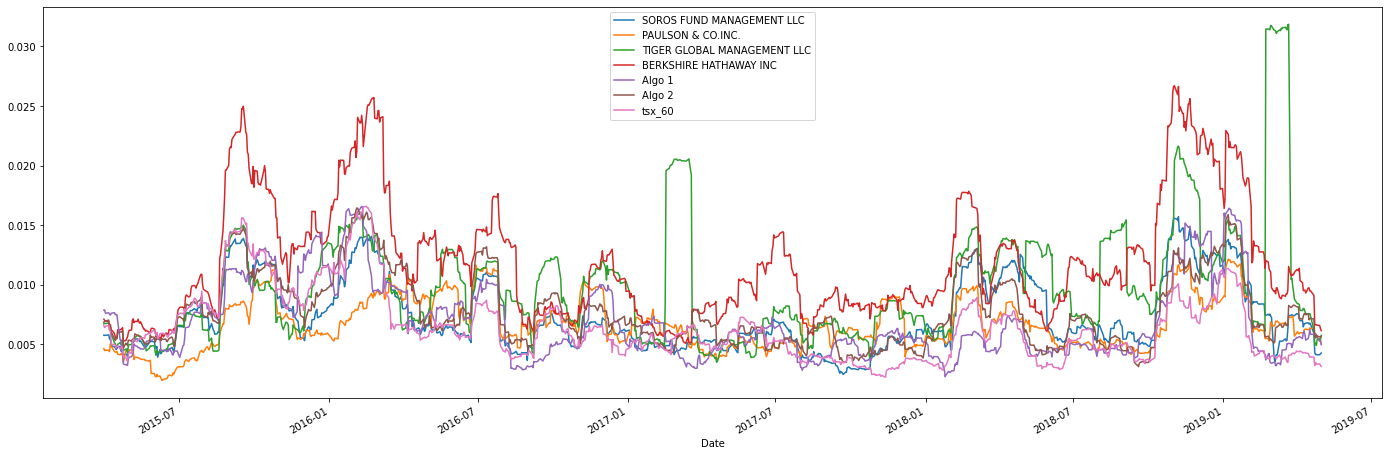

In [74]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_daily_rolling_21 = df_daily.rolling(window = 21).std()
# Plot the rolling standard deviation
df_daily.rolling(window = 21).std().plot(figsize = (24,8))

### Calculate and plot the correlation

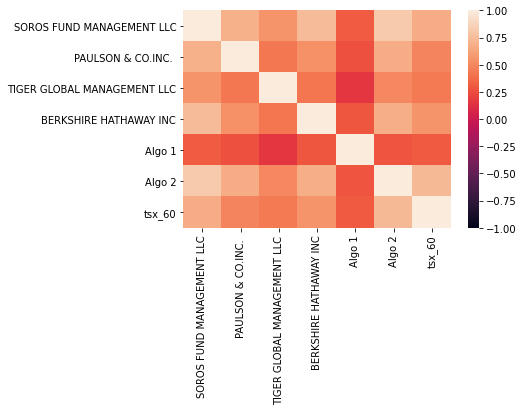

In [75]:
# Calculate the correlation
correlation = df_daily.corr()
import seaborn as sns
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

tsx_60 variance: 4.9479515915131015e-05


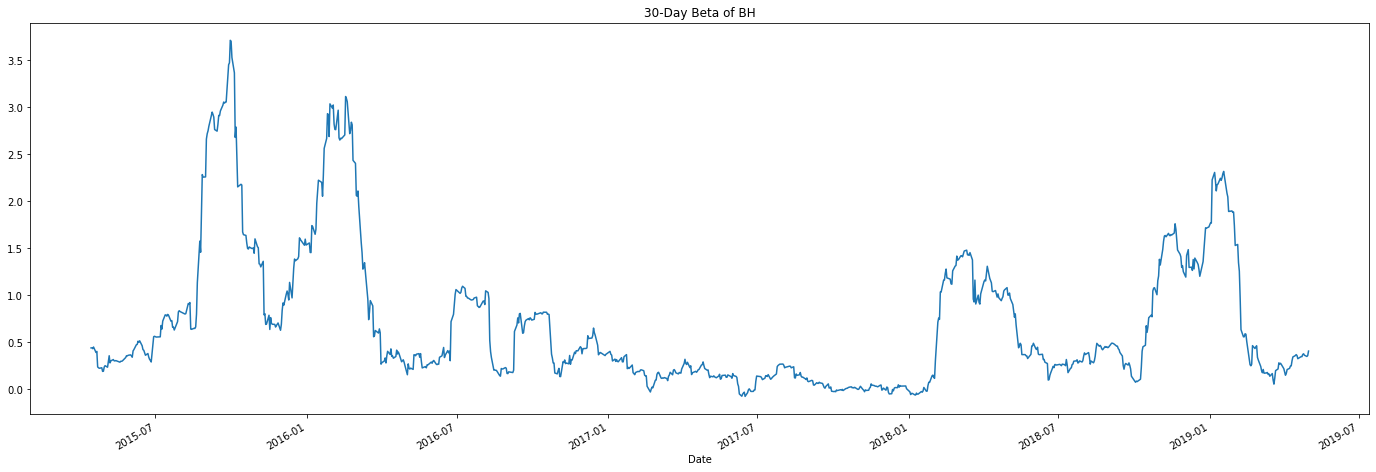

In [76]:
# Calculate covariance of a single portfolio
covariance = df_daily['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=30).cov(df_daily['tsx_60'])
covariance
# Calculate variance of S&P TSX
variance = df_daily['tsx_60'].var()
print(f"tsx_60 variance: {variance}")
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(24, 8), title='30-Day Beta of BH')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

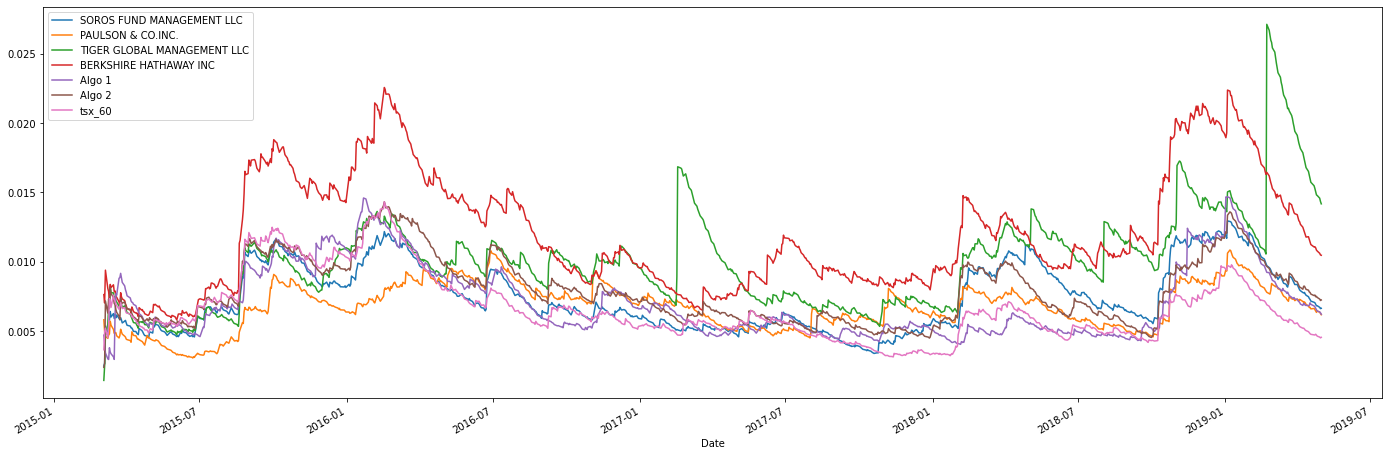

In [77]:
# Use `ewm` to calculate the rolling window
df_daily_ewm = df_daily.ewm(halflife = 21).std()
df_daily_ewm.plot(figsize = (24,8))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [78]:
# Annualized Sharpe Ratios
sharpe_ratios = df_daily.mean()*252/(df_daily.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
tsx_60                         0.195550
dtype: float64

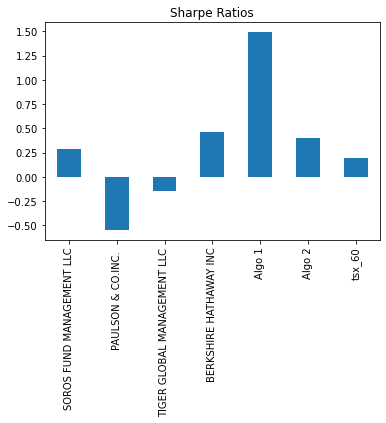

In [79]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [80]:
# Reading data from 1st stock
shop_history = pd.read_csv(Path("C:/Users/Lenovo 80XS/utor-tor-fin-pt-09-2020-u-c/02-Homework/04-Pandas/shop_historical.csv"), index_col="Date", parse_dates = True, infer_datetime_format= True)
shop_history.rename(columns = {"Close":"SHOP"}, inplace = True)
shop_history.head()

,Symbol,SHOP
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [81]:
otex_history = pd.read_csv(Path("C:/Users/Lenovo 80XS/utor-tor-fin-pt-09-2020-u-c/02-Homework/04-Pandas/otex_historical.csv"), index_col="Date", parse_dates = True, infer_datetime_format= True)
otex_history.rename(columns = {"Close":"OTEX"}, inplace = True)
otex_history.head()

,Symbol,OTEX
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [82]:
# Reading data from 3rd stock
l_history = pd.read_csv(Path("C:/Users/Lenovo 80XS/utor-tor-fin-pt-09-2020-u-c/02-Homework/04-Pandas/l_historical.csv"), index_col="Date", parse_dates = True, infer_datetime_format= True)
l_history.rename(columns = {"Close":"LOWS"}, inplace = True)
l_history.head()

,Symbol,LOWS
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [83]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat((shop_history, otex_history, l_history), axis = 1, join= "inner")
all_stocks.sort_index(ascending = True, inplace = True)
all_stocks.head()

,Symbol,SHOP,Symbol,OTEX,Symbol,LOWS
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86


In [84]:
# Reset Date index
all_stocks.index = all_stocks.index.normalize()

In [85]:
# Reorganize portfolio data by having a column per symbol
all_stocks = all_stocks.drop(columns=["Symbol"])
all_stocks.head()

,SHOP,OTEX,LOWS
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [86]:
# Calculate daily returns
all_stocks_daily_returns = all_stocks.pct_change

all_stocks_daily_returns

# Drop NAs

all_stocks.dropna()

# Display sample data
all_stocks.head()

,SHOP,OTEX,LOWS
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [87]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
r_portfolio = all_stocks.dot(weights)
r_portfolio_returns = r_portfolio.pct_change()
r_portfolio_returns.dropna(inplace = True)
r_portfolio_returns.head()

# Display sample data


Date
2018-01-03    0.008561
2018-01-04    0.009167
2018-01-05   -0.002271
2018-01-08    0.005395
2018-01-09   -0.004570
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [88]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat((r_portfolio_returns,df_daily), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"r_portfolio"}, inplace = True)
portfolio_returns

,r_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,tsx_60
Date,,,,,,,,
2018-01-03,0.008561,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.009167,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.002271,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.005395,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.004570,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000388,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008558,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.009159,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [89]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns

,r_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,tsx_60
Date,,,,,,,,
2018-01-03,0.008561,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.009167,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.002271,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.005395,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.004570,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000388,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008558,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.009159,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [90]:
# Calculate the annualized `std`
portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std

,std
r_portfolio,0.021782
SOROS FUND MANAGEMENT LLC,0.009177
PAULSON & CO.INC.,0.007203
TIGER GLOBAL MANAGEMENT LLC,0.013848
BERKSHIRE HATHAWAY INC,0.014328
Algo 1,0.007561
Algo 2,0.008672
tsx_60,0.006244


In [91]:
annualized_portfolio_std = portfolio_std*np.sqrt(252)
annualized_portfolio_std

,std
r_portfolio,0.345776
SOROS FUND MANAGEMENT LLC,0.145675
PAULSON & CO.INC.,0.114343
TIGER GLOBAL MANAGEMENT LLC,0.219833
BERKSHIRE HATHAWAY INC,0.227445
Algo 1,0.120028
Algo 2,0.137664
tsx_60,0.099121


### Calculate and plot rolling `std` with 21-day window

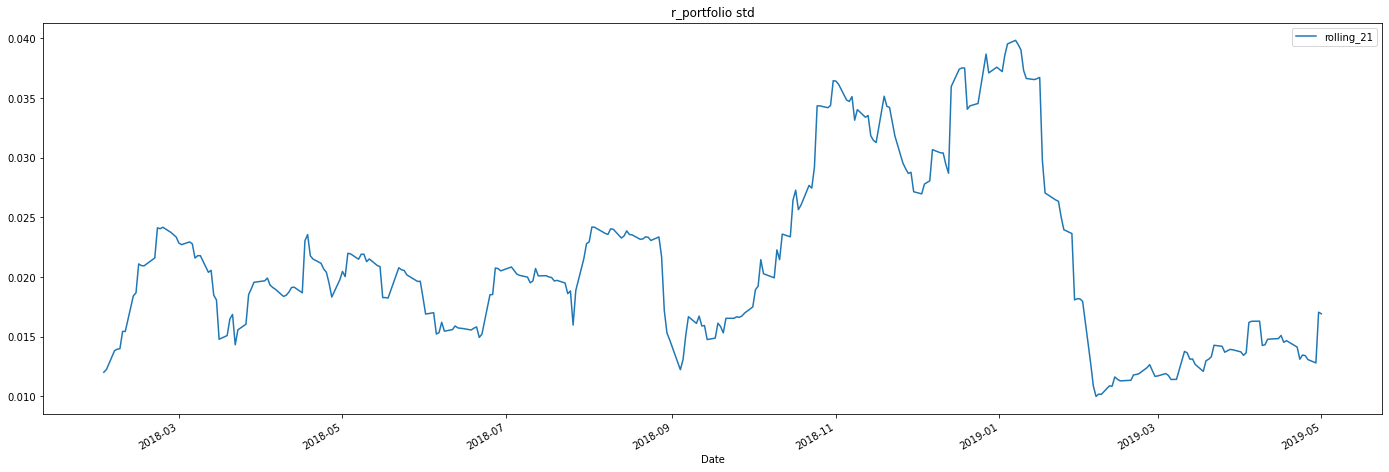

In [92]:
# Calculate rolling standard deviation
ax = r_portfolio_rolling_21 = portfolio_returns[["r_portfolio"]].rolling(window = 21).std()

# Plot rolling standard deviation
ax = r_portfolio_rolling_21.plot(figsize = (24,8), title = 'r_portfolio std')

ax.legend(['rolling_21'])

### Calculate and plot the correlation

In [93]:
# Calculate and plot the correlation
df = portfolio_returns.corr()
df

,r_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,tsx_60
r_portfolio,1.000000,0.532091,0.346201,0.226895,0.650858,0.209165,0.535379,0.509428
SOROS FUND MANAGEMENT LLC,0.532091,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681
PAULSON & CO.INC.,0.346201,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728
TIGER GLOBAL MANAGEMENT LLC,0.226895,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781
BERKSHIRE HATHAWAY INC,0.650858,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817
Algo 1,0.209165,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789
Algo 2,0.535379,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326
tsx_60,0.509428,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000


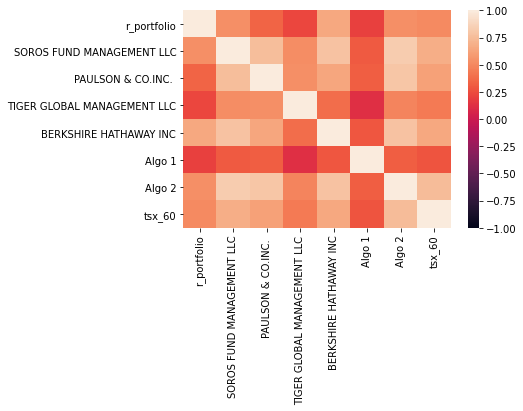

In [94]:
import seaborn as sns

sns.heatmap(df, vmin=-1, vmax=1)

### Calculate and Plot Beta for Your Portfolio compared to the S&P 60 TSX

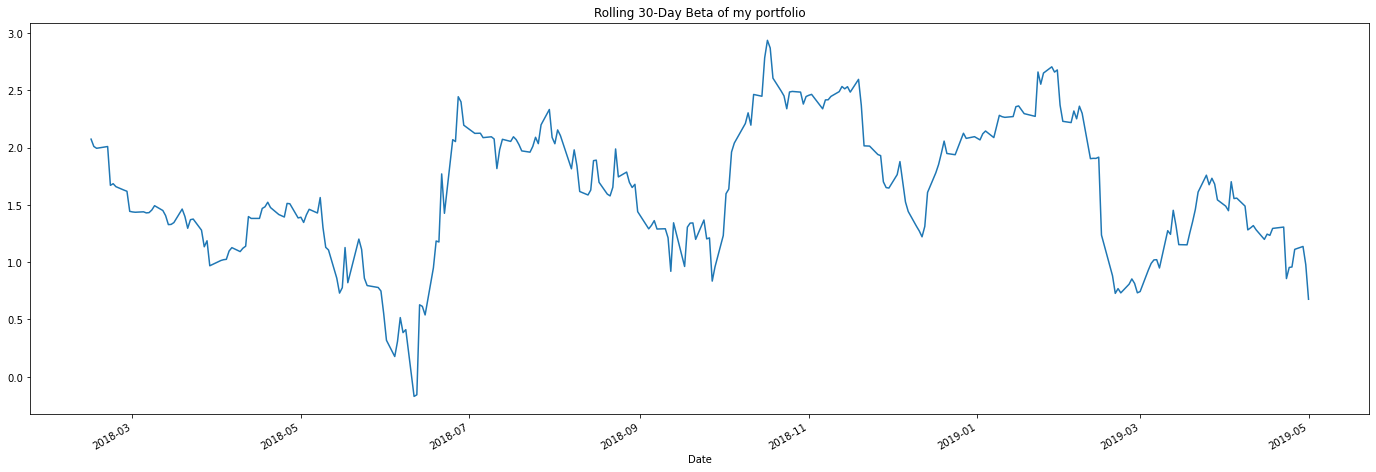

In [95]:
# Calculate and plot Beta

r_covariance = portfolio_returns['r_portfolio'].rolling(window=30).cov(portfolio_returns['tsx_60'])
r_variance = portfolio_returns['tsx_60'].rolling(window=30).var()
r_beta = r_covariance / r_variance
r_beta.plot(figsize=(24, 8), title='Rolling 30-Day Beta of my portfolio')



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [96]:
# Calculate Annualzied Sharpe Ratios
trading_days = portfolio_returns.count()
sharpe_ratios = portfolio_returns.mean()*252/(portfolio_returns.std()*np.sqrt(252))

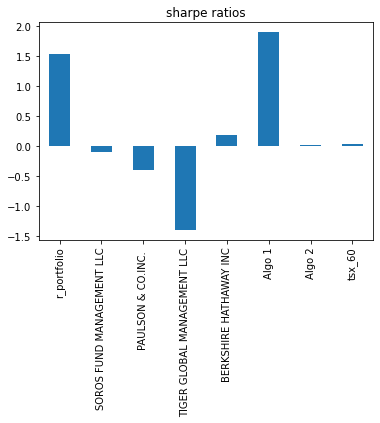

In [97]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

### How does your portfolio do?

Write your answer here!

In [98]:
My portflio is doing wellcompard to market and others portfolio, my beta is higher than market, and daily returns id good. but its highly correlated with algo 1. 

SyntaxError: invalid syntax (<ipython-input-98-85a13f08a3bf>, line 1)